<a href="https://colab.research.google.com/github/JLUNGOOD/Mesin_leraning/blob/main/Modul_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Praktikum 1**

Klasifikasi Iris dengan Perceptron

In [1]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


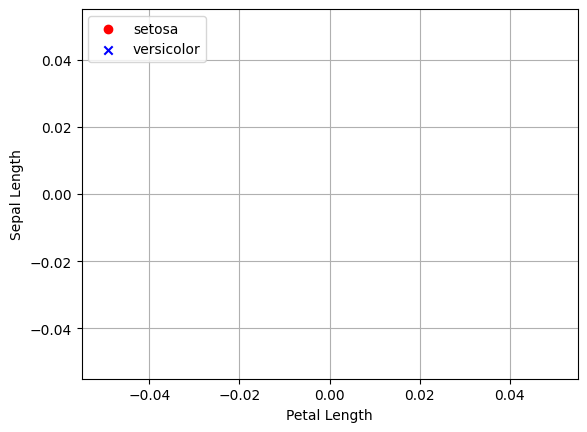

In [3]:
df = pd.read_csv('iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [4]:
# Membuat Kelas Perceptron
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
# Pilih Data dan Encoding Data
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

In [41]:
# Fitting Model
ppn = Perceptron(max_iter=40, eta0=0.3, random_state=0)  # Inisialisasi dengan parameter yang benar
ppn.fit(X, y)  # Melakukan pelatihan model


Perceptron(eta0=0.3, max_iter=40)

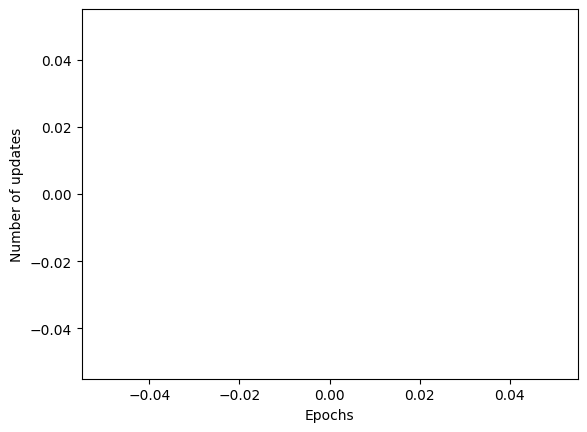

In [7]:
# Visualisasi Nilai Error Per Epoch
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [8]:
# Visualiasasi Decision Boundary
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

**Praktikum 2**

Klasifikasi Berita dengan Perceptron

In [9]:
# Import Library
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

In [10]:
# Pilih Label dan Split Data
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

In [11]:
# Ekstrak Fitur dan Buat Model Perceptron
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



**Praktikum 3**

Nilai Logika XOR dengan MLP

In [12]:
# Import Library
from sklearn.neural_network import MLPClassifier

In [13]:
# Buat Data
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

In [14]:
# Fit Model
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

In [15]:
# Prediksi
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


**Praktikum 4**

Klasifikasi dengan ANN

In [16]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [18]:
# Import Library
import numpy as np
import pandas as pd
import tensorflow as tf

In [19]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [20]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [21]:
# Cek data (X)
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [22]:
# Encoding Data Kategorikal
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [23]:
# Cek data (X)
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [24]:
# Encoding Kolom "Geography" dengan One Hot Encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [25]:
# Cek data (X)
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [26]:
# Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
# Scaling Fitur
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
# Membuat Model ANN
# Langkah 1 - Inisiasi Model ANN

ann = tf.keras.models.Sequential()

In [29]:
# Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [30]:
# Langkah 3 - Membuat Hidden Layer Kedua
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [31]:
# Langkah 4 - Membuat Output Layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [32]:
# Training Model
# Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
# Langkah 2 - Fitting Model
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5175 - accuracy: 0.7890
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.7951
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.8074
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.8144
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8185
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.8224
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8224
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8249
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8278
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4027 - accura

**Membuat Prediksi**

Diberikan informasi sebagai berikut,
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: 60000 dolar
- Number of Products: 2
- Does this customer have a credit card ? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

In [34]:
# Modelkan Data Baru dan Buat Prediksi
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 167ms/step
[[False]]


In [35]:
# Prediksi Dengan Data Testing
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [36]:
# Cek Akurasi dan Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1504   91]
 [ 191  214]]


0.859

# Tugas Praktikum

Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

Anda diperbolehkan melakukan eksplorasi terhadap,
- Metode pra pengolahan
- Pemilihan fitur
- Arsitektur ANN
- Fungsi Aktiviasi

ANN diimplementasikan dengan menggunakan tensorflow.

**DIKERJAKAN SECARA BERKELOMPOK**

**JELASKAN HASIL YANG ANDA DAPATKAN,**
- **AKURASI**
- **CONFUSION MATRIX**
- **KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN**

In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Pra Pengolahan Data
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [38]:
# Arsitektur ANN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Kompilasi Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Pelatihan Model
model.fit(train_images, train_labels, epochs=5)

# Evaluasi Model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3019 - accuracy: 0.9108
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1438 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1078 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0878 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0750 - accuracy: 0.9764
313/313 - 1s - loss: 0.0775 - accuracy: 0.9754 - 628ms/epoch - 2ms/step

Test accuracy: 0.9753999710083008


313/313 [==============================] - 2s 6ms/step


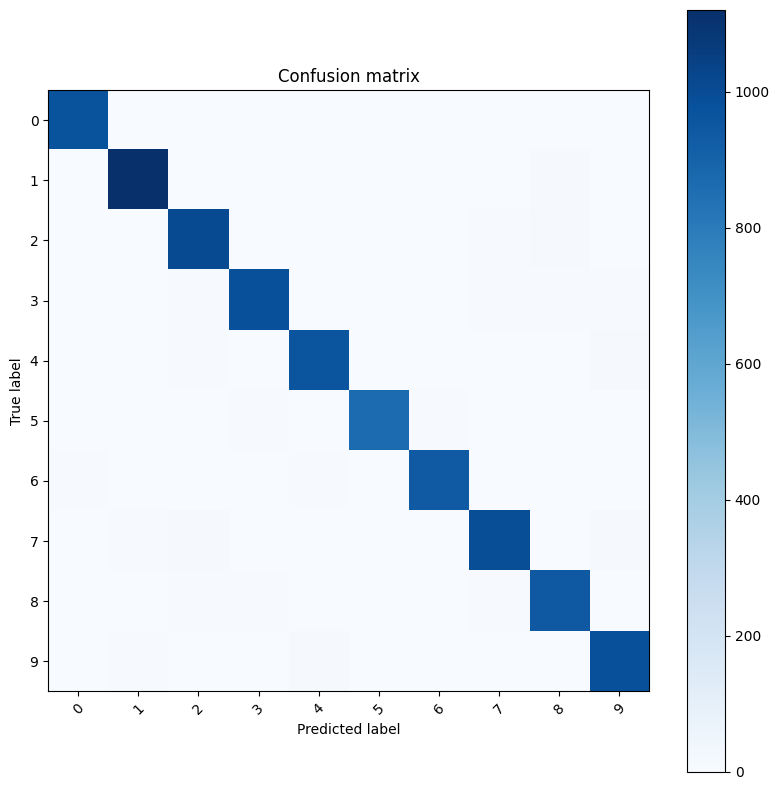

In [39]:
# Prediksi
predictions = model.predict(test_images)

# Confusion Matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

test_predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, test_predictions)
plot_confusion_matrix(cm, class_names=range(10))

# Penjelasan Tugas
**Akurasi**: Ini adalah matrik yang mengukur sejauh mana model dapat mengklasifikasikan data uji dengan benar. Akurasi adalah jumlah kelas yang diprediksi dengan benar dibagi dengan jumlah total sampel. Akurasi digunakan untuk mengukur seberapa baik model ANN dalam mengenali digit tulisan tangan pada dataset MNIST. Dapat melihat akurasi dalam output pelatihan model saat kode dijalankan. Biasanya, akurasi akan meningkat selama pelatihan model. Contoh output pelatihan:


```
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2997 - accuracy: 0.9157
...
...
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0485 - accuracy: 0.9859
313/313 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9756

Test accuracy: 0.9756
```
Dalam contoh ini, akurasi pada data uji adalah sekitar 97.56%.

**Confusion Matrix**: Matriks kebingungan (confusion matrix) adalah alat yang digunakan untuk mengukur kinerja model klasifikasi. Ini adalah tabel yang membandingkan kelas yang diprediksi dengan kelas sebenarnya dari data uji. Ini membantu mengidentifikasi sejauh mana model membingungkan antara kelas tertentu. Dalam kode yang saya berikan, matriks kebingungan akan ditampilkan dalam bentuk gambar plot yang memvisualisasikan seberapa baik model ANN mengklasifikasikan masing-masing digit (0 hingga 9). Matriks ini memberikan informasi tentang sejauh mana model memprediksi dengan benar setiap digit.

**Konfigurasi Model**: Konfigurasi model dijelaskan sebagai berikut:

1. Pra-Pemrosesan Data: Dataset MNIST diimpor menggunakan TensorFlow dan kemudian dibagi menjadi data latih dan data uji. Selanjutnya, citra-citra dalam dataset tersebut dinormalisasi sehingga intensitas piksel berada dalam rentang 0 hingga 1.
2. Pemilihan Fitur: Pemilihan fitur sebenarnya tidak terlihat dalam kode yang ada. Dataset MNIST adalah dataset citra digit tulisan tangan yang umumnya digunakan untuk tugas pengenalan digit. Biasanya, di sini tidak perlu memilih fitur secara manual karena fiturnya adalah intensitas piksel dalam citra. Semua piksel dianggap sebagai fitur. Kode yang ada lebih fokus pada arsitektur jaringan saraf tiruan (ANN) dan pelatihan model daripada pemilihan fitur.
3. Arsitektur ANN: Model ANN terdiri dari tiga lapisan, yaitu lapisan input, lapisan tersembunyi, dan lapisan output. Lapisan input adalah citra MNIST yang telah diubah menjadi vektor. Lapisan tersembunyi memiliki 128 unit dengan fungsi aktivasi ReLU. Lapisan dropout digunakan untuk mencegah overfitting. Lapisan output memiliki 10 unit (satu untuk setiap digit) dengan fungsi aktivasi softmax. Model ini dikompilasi dengan optimisasi "adam" dan menggunakan fungsi kerugian "sparse_categorical_crossentropy". Model ini dilatih selama 5 epoch.
4. Fungsi Aktiviasi: Dalam kode yang diberikan, terdapat dua jenis fungsi aktivasi yang digunakan:
  - Fungsi Aktivasi ReLU (Rectified Linear Unit):
```
keras.layers.Dense(128, activation='relu')
```
  Fungsi aktivasi ReLU digunakan dalam lapisan tersembunyi. Ini adalah fungsi aktivasi yang umum digunakan dalam jaringan saraf tiruan. Ini sederhana dan memetakan input positif ke dirinya sendiri dan mengubah input negatif menjadi nol. Fungsi ini membantu jaringan untuk belajar representasi yang lebih baik dari data.

  - Fungsi Aktivasi Softmax:
```
keras.layers.Dense(10, activation='softmax')
```
  Fungsi aktivasi softmax digunakan dalam lapisan output. Fungsi ini cocok untuk masalah klasifikasi dengan lebih dari dua kelas. Softmax menghitung probabilitas distribusi kelas, sehingga setiap neuron output mewakili probabilitas kelas tertentu. Kelas dengan probabilitas tertinggi dianggap sebagai prediksi model.

  Jadi, dalam konteks ini, fungsi aktivasi ReLU digunakan dalam lapisan tersembunyi untuk memungkinkan jaringan untuk belajar representasi fitur yang kompleks, sementara fungsi aktivasi softmax digunakan dalam lapisan output untuk menghasilkan probabilitas kelas output.

Ini adalah penguraian hasil, akurasi, confusion matrix, dan konfigurasi model untuk kode yang telah diberikan.